# Environment II (0.8-quantile)

In this notebook, we show the simulation for the Group Two design.

We consider $K = 20 + m$ arms with 15 arm A, 5 arm B and $m$ arm C (optimal arms).
The goal is to identify $m$ arms with maximum $0.8$-quantile.
Both mean and 0.8-quantile provide the same order of arms, while
0.8-quantile can provide a larger gap compared with the mean.
The environment with larger minimum suboptimality gap has smaller probability complexity
and thus smaller upper bound of probability of error (it holds for the mean-based algorithm \citep{bubeck2013multiple} as well).
We compare our algorithms with the baseline algorithms:
- mean-based Successive Accepts and Rejects (SAR) \citep{bubeck2013multiple}.
- mean-based Successive Rejects (SR) \citep{audibert2010best}.
- Quantile Successive Rejects (Q-SR). 

In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
from ipywidgets import IntProgress
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict
import seaborn as sns
import pickle
from prettytable import PrettyTable

from codes.BAI_FixedBudget import *
from codes.Environment import Mixture_AbsGau, setup_env, Exp
from codes.SimulatedGames import simulate
from codes.plots import *

%matplotlib inline

In [2]:

# setting
results = defaultdict(dict)
num_exper = 5000
epsilon = 0


m = 5 # number of recommendation
tau = 0.8 # quantile level

if m == 1:
    budget_list = [500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500]
elif m == 5:
    budget_list = [1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000]

# output/plot setting

output_file = '../saved_results/Group_Two_'  + 'm' + str(m) + '_exper_' + str(num_exper) + '_' + 'budget_' + str(budget_list[0]) + '_' + str(budget_list[-1]) 
budget_plot_title = 'BAI with '+ str(tau) + '-quantile (m=' + str(m) + ')'
print(output_file)

../saved_results/Group_Two_m5_exper_5000_budget_1000_4000


In [3]:
# environment

environment_m1 = [
    {Mixture_AbsGau: [[0, 2, 0,1, 1], [3.5, 2, 0, 1, 1], 
                      [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], 
                      [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1],  
                     ],
     Exp: [[1/4], # [1/4], [1/4], [1/4], [1/4]
     ]
    } # mu1, sigma1, mu2, sigma2, p 
]

environment_m5 = [
    {Mixture_AbsGau: [[0, 2, 0,1, 1], [3.5, 2, 0, 1, 1], 
                      [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], 
                      [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1], 
                      [0, 2, 0,1, 1],  
                      [0, 2, 0,1, 1],  
                     ],
     Exp: [[1/4], [1/4], [1/4], [1/4], [1/4]
     ]
    } # mu1, sigma1, mu2, sigma2, p 
]

if m == 1:
  environments = environment_m1
elif m == 5:
  environments = environment_m5
else: 
  print('Unknown environment!')

rewards_env_quant, true_ss_dict_quant, samples_quant = setup_env(environments, ['quantile_' + str(tau)])
rewards_env_mean, true_ss_dict_mean, samples_mean = setup_env(environments, ['mean'])

{<class 'codes.Environment.Mixture_AbsGau'>: [[0, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1]], <class 'codes.Environment.Exp'>: [[0.25], [0.25], [0.25], [0.25], [0.25]]}
{<class 'codes.Environment.Mixture_AbsGau'>: [[0, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [3.5, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1], [0, 2, 0, 1, 1]], <class 'codes.Environment.Exp'>: [[0.25], [0.25], [0.25], [0.25], [0.25]]}


In [4]:
# run experiments

def run_exper(rewards_env, summary_stats, policy, epsilon, m, budget, num_exper, fixed_samples_list = None,policy_for_mean = False):
    for key in rewards_env.keys():
        name = key + '_' + str(num_exper)
        if policy_for_mean:
                policy_name = str(policy).split('.')[-1].split('\'')[0] + '-'
                policy_name = policy_name[2:]
                # print(policy_name)
        else:
                policy_name = str(policy).split('.')[-1].split('\'')[0] + '-'

        subname = policy_name  + str(budget) 
        p = IntProgress(max = num_exper)
        p.description = 'Running'
        display(p)
        results[name][subname] = []

        result = simulate(rewards_env[key],summary_stats[key], policy, 
                epsilon, m, budget, num_exper, p, fixed_samples_list)
        results[name][subname].append(result)

In [5]:
if not os.path.isfile(output_file):
    for budget in budget_list:
        run_exper(rewards_env_quant, true_ss_dict_quant, Q_SR, epsilon, m, budget, num_exper)
        run_exper(rewards_env_quant, true_ss_dict_quant, Q_SAR_Simplified, epsilon, m, budget, num_exper)
        run_exper(rewards_env_mean, true_ss_dict_mean, Q_SR, epsilon, m, budget, num_exper, policy_for_mean = True)
        run_exper(rewards_env_mean, true_ss_dict_mean, Q_SAR_Simplified, epsilon, m, budget, num_exper, policy_for_mean = True)

  Budget  Probability of Error       std Policy
0   1000                0.7428  0.043709   Q-SR
1   1000                0.5884  0.049212  Q-SAR
2   1000                0.9150  0.027888     SR
3   1000                0.8694  0.033696    SAR
4   1250                0.6456  0.047833   Q-SR


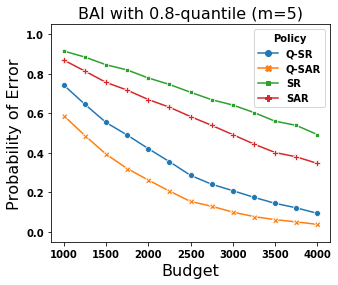

In [6]:
# save results

if os.path.isfile(output_file):
    with open(output_file, 'rb') as handle:
        results = pickle.load(handle)
else:
    with open(output_file, 'wb') as handle:
         pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

plot_eva_budget(results, 'pe', paper_flag = True, with_para = True, title = budget_plot_title, log_scale = False)